In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
! pip install transformers datasets

In [4]:
import transformers
import datasets
from transformers import GPT2Tokenizer
from transformers import TFGPT2LMHeadModel
from transformers import DataCollator

In [5]:
import re

In [6]:
model_checkpoint = "gpt2"

In [7]:
with open("/kaggle/input/shakespeare/shakespeare.txt", 'r') as file:
  content = file.readlines()

In [8]:
len(content)

2469

In [9]:
def preprocess(text):
  text = text.lower()
  text = re.sub(re.compile('https?://\S+|www\.\S+|\d+|<.*?>'), '', text)
  return text

In [10]:
corpus = []
for x in content:
  x = x.replace("\n", "")
  x = x.strip()
  if len(x) > 5:
    corpus.append(preprocess(x))

In [11]:
corpus

['the sonnets',
 'by william shakespeare',
 'from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and tender churl mak'st waste in niggarding:",
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lusty days;',
 'to 

In [12]:
len(corpus)

2158

In [13]:
tokenizer = GPT2Tokenizer.from_pretrained(model_checkpoint)

In [14]:
def tokenization(text):
    tokenizer.pad_token = tokenizer.eos_token
    tokens = tokenizer(text, truncation=True, padding = True, return_tensors='tf')

    ids = tokens['input_ids']

    return {'input_ids': ids[:,:-1].numpy(),
            'labels': ids[:,1:].numpy(),
            'attention_mask': tokens['attention_mask'][:,1:].numpy()}

In [15]:
train_data = tokenization(corpus)

In [16]:
train_data

{'input_ids': array([[ 1169,  3367, 45938, ..., 50256, 50256, 50256],
        [ 1525,   481,  1789, ..., 50256, 50256, 50256],
        [ 6738, 37063,   301, ..., 50256, 50256, 50256],
        ...,
        [   66,   480,   612, ..., 50256, 50256, 50256],
        [23205,   338,  2046, ..., 50256, 50256, 50256],
        [ 1169,   886, 50256, ..., 50256, 50256, 50256]], dtype=int32),
 'labels': array([[ 3367, 45938, 50256, ..., 50256, 50256, 50256],
        [  481,  1789,   427, ..., 50256, 50256, 50256],
        [37063,   301,  8109, ..., 50256, 50256, 50256],
        ...,
        [  480,   612,   329, ..., 50256, 50256, 50256],
        [  338,  2046, 37876, ..., 50256, 50256, 50256],
        [  886, 50256, 50256, ..., 50256, 50256, 50256]], dtype=int32),
 'attention_mask': array([[1, 1, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=i

In [17]:
data_collator = DataCollator(tokenizer)

In [18]:
model = TFGPT2LMHeadModel.from_pretrained(model_checkpoint, pad_token_id = tokenizer.eos_token_id)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [19]:
train_data

{'input_ids': array([[ 1169,  3367, 45938, ..., 50256, 50256, 50256],
        [ 1525,   481,  1789, ..., 50256, 50256, 50256],
        [ 6738, 37063,   301, ..., 50256, 50256, 50256],
        ...,
        [   66,   480,   612, ..., 50256, 50256, 50256],
        [23205,   338,  2046, ..., 50256, 50256, 50256],
        [ 1169,   886, 50256, ..., 50256, 50256, 50256]], dtype=int32),
 'labels': array([[ 3367, 45938, 50256, ..., 50256, 50256, 50256],
        [  481,  1789,   427, ..., 50256, 50256, 50256],
        [37063,   301,  8109, ..., 50256, 50256, 50256],
        ...,
        [  480,   612,   329, ..., 50256, 50256, 50256],
        [  338,  2046, 37876, ..., 50256, 50256, 50256],
        [  886, 50256, 50256, ..., 50256, 50256, 50256]], dtype=int32),
 'attention_mask': array([[1, 1, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=i

In [20]:
opt = transformers.AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)

In [21]:
model.compile(optimizer=opt)

In [22]:
model.fit(x = train_data ,epochs=100, verbose=True)

Epoch 1/100
68/68 [==============================] - 34s 165ms/step - loss: 4.7996
Epoch 2/100
68/68 [==============================] - 11s 164ms/step - loss: 4.0123
Epoch 3/100
68/68 [==============================] - 11s 164ms/step - loss: 3.8686
Epoch 4/100
68/68 [==============================] - 11s 164ms/step - loss: 3.7592
Epoch 5/100
68/68 [==============================] - 11s 164ms/step - loss: 3.6977
Epoch 6/100
68/68 [==============================] - 11s 165ms/step - loss: 3.6325
Epoch 7/100
68/68 [==============================] - 11s 164ms/step - loss: 3.5869
Epoch 8/100
68/68 [==============================] - 11s 165ms/step - loss: 3.5352
Epoch 9/100
68/68 [==============================] - 11s 165ms/step - loss: 3.4858
Epoch 10/100
68/68 [==============================] - 11s 165ms/step - loss: 3.4456
Epoch 11/100
68/68 [==============================] - 11s 166ms/step - loss: 3.3833
Epoch 12/100
68/68 [==============================] - 11s 165ms/step - loss: 3.3300
E

In [23]:
model.fit(x = train_data ,epochs=20, verbose=True)

Epoch 1/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4883
Epoch 2/20
68/68 [==============================] - 11s 165ms/step - loss: 0.4783
Epoch 3/20
68/68 [==============================] - 11s 165ms/step - loss: 0.4798
Epoch 4/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4754
Epoch 5/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4709
Epoch 6/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4706
Epoch 7/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4711
Epoch 8/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4678
Epoch 9/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4583
Epoch 10/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4644
Epoch 11/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4561
Epoch 12/20
68/68 [==============================] - 11s 164ms/step - loss: 0.4525
Epoch 13/20
6

In [24]:
model.save_pretrained('txt_gpt')

In [25]:
tokenizer.save_pretrained("tokens_gpt")

('tokens_gpt/tokenizer_config.json',
 'tokens_gpt/special_tokens_map.json',
 'tokens_gpt/vocab.json',
 'tokens_gpt/merges.txt',
 'tokens_gpt/added_tokens.json')

In [29]:
model.history.history.keys()

dict_keys(['loss'])

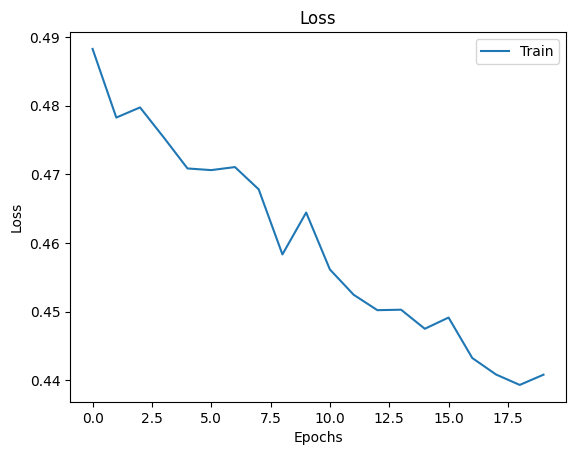

In [33]:
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.legend(['Train'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [34]:
from transformers import pipeline

In [35]:
pipe = pipeline(task = "text-generation", model="/kaggle/working/txt_gpt", tokenizer="/kaggle/working/tokens_gpt")

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at /kaggle/working/txt_gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [36]:
pipe("but let your love")

[{'generated_text': 'but let your love with thy be confined'}]

In [37]:
pipe("if thinking on me")

[{'generated_text': 'if thinking on me should you make mind'}]

In [38]:
pipe("if some suspect of ill")

[{'generated_text': 'if some suspect of ill not show fair,'}]

In [39]:
pipe("what merit lived in me")

[{'generated_text': 'what merit lived in me you love, love well'}]

# Thanks